In [98]:
import numpy as np
import matplotlib.pyplot as plt
import math

## Geometria

In [99]:
larghezza_pla=26.7 #cm
lunghezza_pla=52.5
prodondità_pla=2.3
area_pla=larghezza_pla*lunghezza_pla
print(f"Area sovrapposizone plastici {area_pla:.2f} cm^2.")

Area sovrapposizone plastici 1401.75 cm^2.


In [100]:
flusso=1/60 #al cm^2
conteggi=area_pla/60
print(f"Conteggi attesi {conteggi:.2f} al secondo su ogni singolo scintillatore.")

Conteggi attesi 23.36 al secondo su ogni singolo scintillatore.


In [101]:
larghezza_bers=30 #cm 
lunghezza_bers=31 #cm per entrambi gli oggetti
profondità_bers=30 #cm per entrambi gli oggetti
area_bers=larghezza_bers*lunghezza_bers
print(f"Area sovrapposizone bersaglio {area_bers:.2f} cm^2.")

larghezza_b1=larghezza_bers/2
lunghezza_b1=lunghezza_bers/2
profondità_b1=profondità_bers/2
area_b1=larghezza_b1*lunghezza_b1
print(f"Area singoli cosi del bersaglio {area_b1:.2f} cm^2.")

Area sovrapposizone bersaglio 930.00 cm^2.
Area singoli cosi del bersaglio 232.50 cm^2.


## Angolo solido sotteso e rate atteso

Quando guardo al segnale di START io sto guardando la coincidenza tra gli scintillatori sopra e l'OR del bersaglio. Considera quindi l'angolo solido sotteso dal PMT7 rispetto al bersaglio complessivo

In [ ]:
distanza_7_4=28.9 #cm
ditanza_4_2=39.4
distanza_2_b=7
distanza_b_1=15

In [109]:
# Function to calculate the solid angle
def solid_angle(width, length, distance):
    """Calculate the solid angle of a rectangular target."""
    half_width = width / 2
    half_length = length / 2
    r = distance
    return 4 * math.atan((half_width * half_length) / (r * math.sqrt(r**2 + half_width**2 + half_length**2)))

# Calculate solid angles
solid_angle_7 = solid_angle(larghezzab, lunghezzab, distanza_7_4 + distanza_4_2 + distanza_2_b)
print(f"Solid angle from PMT7 to target: {solid_angle_7:.4f} sr")

Solid angle from PMT7 to target: 0.1576 sr


Mentre l'angolo massimo sotteso è detterminato dallo scintillatore più in alto

In [ ]:
theta_max=lunghezza/2)

In [ ]:
# Convert dimensions to meters
larghezza_m = larghezza / 100
lunghezza_m = lunghezza / 100
larghezzab_m = larghezzab / 100
lunghezzab_m = lunghezzab / 100

# Calculate area in square meters
area = larghezza_m * lunghezza_m
area_b = larghezzab_m * lunghezzab_m

# Convert distances to meters
distanza_7_4_m = distanza_7_4 / 100
distanza_4_2_m = distanza_4_2 / 100
distanza_2_b_m = distanza_2_b / 100
distanza_b_1_m = distanza_b_1 / 100

# Cosmic ray flux in s^-1 m^-2 sr^-1
flux = 100

# Calculate expected rates
rate_7 = flux * area * solid_angle_7
rate_4 = flux * area * solid_angle_4
rate_2 = flux * area * solid_angle_2
rate_1 = flux * area * solid_angle_1

print(f"Expected cosmic ray rate from PMT7 to target B: {rate_7:.4f} s^-1")

Expected cosmic ray rate from PMT7 to target B: 2.2091 s^-1
Expected cosmic ray rate from PMT4 to target B: 5.4733 s^-1
Expected cosmic ray rate from PMT2 to target B: 54.4855 s^-1


## Curve di efficienza bersaglio

Ricorda che qui stai trascurando le triple accidentali

In [28]:
time=10 #s
len_segnale=25e-9
#tensione 1. 1770
#tensione 2. 1700

V_8= np.array([873, 906, 934, 964, 1010, 1016, 1050, 1103, 1153, 1201, 1252, 1304, 1356, 1400, 1450, 1481, 1499])
V_9= np.array([910, 933, 960, 982, 983, 1012,1054, 1107, 1150, 1207, 1256, 1304, 1356, 1402, 1448, 1483, 1500])
V_10=np.array([822, 854, 887, 904, 921, 953, 1001, 1050, 1101, 1158, 1205, 1249, 1306, 1357, 1400, 1462, 1481 ])
V_11= np.array([875, 896, 917, 935, 964, 992, 1050, 1103, 1156, 1202, 1250, 1306, 1353, 1404, 1453, 1483, 1500])

triple_8= np.array([3, 8, 8, 10, 10,  7,7, 12, 9, 15, 13, 7, 13, 12, 10, 9, 13])
triple_9 =np.array([5, 7, 5, 8, 8, 12, 5,12, 11, 17, 16, 12, 10, 10, 12, 15, 16])
triple_10=np.array([ 3, 5, 6, 10, 5, 3, 6, 9, 7, 7, 11, 3, 6, 10, 11,11, 15])
triple_11 =np.array([7, 7, 11, 9, 11, 14, 10, 12, 12, 16, 20, 13, 13, 15, 11, 18, 14])
doppie_1_2= np.array([25, 24, 20, 29,  19, 25,16, 26, 25, 35, 36, 22, 24, 21, 20, 28, 28])
counts_1= np.array([3231, 3165, 3226, 3096,  3153, 3074, 3179, 3098, 3124, 3270, 3202, 3055, 3066, 3102, 3174, 3038, 3071])
counts_2= np.array([184, 188, 177, 168, 174, 180, 147, 158, 175, 171, 185, 158, 162, 167, 158, 160, 187])

In [29]:
rate1_2=doppie_1_2/time
rate1=counts_1/time
rate2=counts_2/time

error8=np.sqrt(triple_8)
error9=np.sqrt(triple_9)
error10=np.sqrt(triple_10)
error11=np.sqrt(triple_11)
error1_2=np.sqrt(doppie_1_2)
error1=np.sqrt(counts_1)
error2=np.sqrt(counts_2)

In [30]:
def sigma_eff(nt, nd,  ndacc,sigma_ndacc):    
    epsilon=nt/(nd-ndacc)
    sigma_nt=np.sqrt(nd*epsilon*(1-epsilon))

    term_1=sigma_nt/(nd-ndacc)
    term_2=nt*sigma_ndacc/(nd-ndacc)**2
    sigma_eff=np.sqrt(term_1**2+term_2**2)
    return sigma_eff

In [31]:
counts_acc= counts_1*counts_2*(2*len_segnale-2*2e-9)/time #coincidenza minima di 2ns
sigma_counts_acc=np.sqrt((error1*counts_2)**2+(counts_1*error2)**2)*(2*len_segnale-2*2e-9)/time

eff_8=triple_8/(doppie_1_2-counts_acc)
error_eff8=sigma_eff(triple_8, doppie_1_2, counts_acc, sigma_counts_acc)
eff_9=triple_9/(doppie_1_2-counts_acc)
error_eff9=sigma_eff(triple_9, doppie_1_2, counts_acc, sigma_counts_acc)
eff_10=triple_10/(doppie_1_2-counts_acc)
error_eff10=sigma_eff(triple_10, doppie_1_2, counts_acc, sigma_counts_acc)
eff_11=triple_11/(doppie_1_2-counts_acc)
error_eff11=sigma_eff(triple_11, doppie_1_2, counts_acc, sigma_counts_acc)


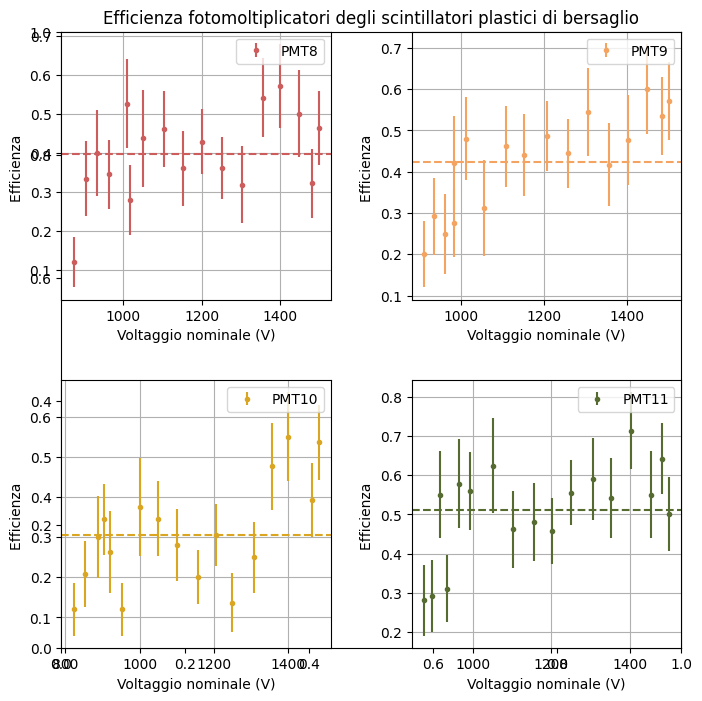

In [45]:
plt.figure(figsize=(8,8))
plt.subplots_adjust(hspace=0.3, wspace=0.3)
plt.title('Efficienza fotomoltiplicatori degli scintillatori plastici di bersaglio')

plt.subplot(2,2,1)
plt.errorbar(V_8,eff_8,error_eff8, fmt='.', color='indianred',label='PMT8')
plt.axhline(np.mean(eff_8), linestyle='--', color='indianred')
plt.xlabel('Voltaggio nominale (V)')
plt.ylabel('Efficienza ')
plt.grid(True)
plt.legend()

plt.subplot(2,2,2)
plt.errorbar(V_9,eff_9,error_eff9, fmt='.', color='sandybrown', label='PMT9')
plt.axhline(np.mean(eff_9), linestyle='--', color='sandybrown')
plt.xlabel('Voltaggio nominale (V)')
plt.ylabel('Efficienza ')
plt.grid(True)
plt.legend()
plt.subplot(2,2,3)
plt.errorbar(V_10,eff_10,error_eff10, fmt='.', color='goldenrod', label='PMT10')
plt.axhline(np.mean(eff_10), linestyle='--', color='goldenrod')
plt.xlabel('Voltaggio nominale (V)')
plt.ylabel('Efficienza ')
plt.grid(True)
plt.legend()

plt.subplot(2,2,4)
plt.errorbar(V_11,eff_11,error_eff11, fmt='.', color='darkolivegreen',label='PMT11')
plt.axhline(np.mean(eff_11), linestyle='--', color='darkolivegreen')
plt.xlabel('Voltaggio nominale (V)')
plt.ylabel('Efficienza ')
plt.grid(True)
plt.legend()
plt.show()

## Curve efficienza scintillatori plastici

In [87]:
time=10 #s
len_segnale=25e-9
#PMT3 voltaggio: 1770 V 
#PMT4 voltaggio: 1700 V
rate_3=743/10
rate_4=1973/10

In [88]:
V= np.array([1600, 1650, 1700, 1750, 1800])

triple_1= np.array([9, 13, 12, 20, 33])
triple_2 =np.array([4, 16, 22, 41, 62])
triple_5=np.array([69, 114, 73, 52, 30])
triple_7 =np.array([1, 14, 34, 48, 66])
doppie_3_4= np.array([152, 183, 154, 153, 193])
counts_1= np.array([183, 475, 915, 2084, 39783])
counts_2= np.array([22, 87, 155, 313, 558])

In [89]:
rate1=counts_1/time
rate2=counts_2/time

errorrate1=np.sqrt(counts_1)/time
errorrate2=np.sqrt(counts_2)/time

error3_4=np.sqrt(doppie_3_4)

error1=np.sqrt(triple_1)
error2=np.sqrt(triple_2)
error5=np.sqrt(triple_5)
error7=np.sqrt(triple_7)

In [90]:
counts_acc= 743*1973*(2*len_segnale-2*2e-9)/10 #coincidenza minima di 2ns
sigma_counts_acc=np.sqrt((np.sqrt(743)*1973)**2+(743*np.sqrt(1973))**2)*(2*len_segnale-2*2e-9)/10

eff_1=triple_1/(doppie_3_4-counts_acc)
error_eff1=sigma_eff(triple_1, doppie_3_4, counts_acc, sigma_counts_acc)
eff_2=triple_2/(doppie_3_4-counts_acc)
error_eff2=sigma_eff(triple_2, doppie_3_4, counts_acc, sigma_counts_acc)
eff_5=triple_5/(doppie_3_4-counts_acc)
error_eff5=sigma_eff(triple_5, doppie_3_4, counts_acc, sigma_counts_acc)
eff_7=triple_7/(doppie_3_4-counts_acc)
error_eff7=sigma_eff(triple_7, doppie_3_4, counts_acc, sigma_counts_acc)

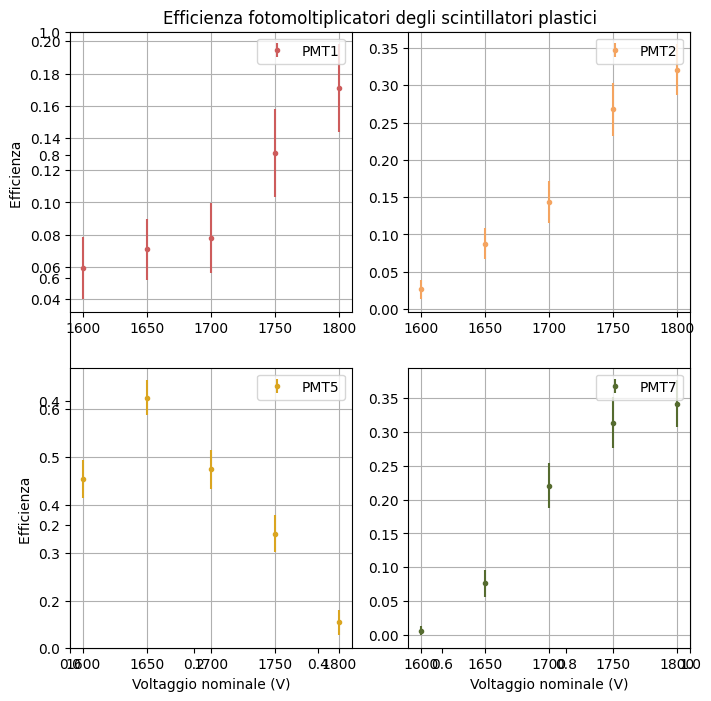

In [91]:
plt.figure(figsize=(8,8))
plt.tight_layout
plt.title('Efficienza fotomoltiplicatori degli scintillatori plastici')

plt.subplot(2,2,1)
plt.errorbar(V,eff_1,error_eff1, fmt='.', color='indianred',label='PMT1')
plt.ylabel('Efficienza ')
plt.grid(True)
plt.legend()

plt.subplot(2,2,2)
plt.errorbar(V,eff_2,error_eff2, fmt='.', color='sandybrown', label='PMT2')
plt.grid(True)
plt.legend()

plt.subplot(2,2,3)
plt.errorbar(V,eff_5,error_eff5, fmt='.', color='goldenrod', label='PMT5')
plt.xlabel('Voltaggio nominale (V)')
plt.ylabel('Efficienza ')
plt.grid(True)
plt.legend()

plt.subplot(2,2,4)
plt.errorbar(V,eff_7,error_eff7, fmt='.', color='darkolivegreen',label='PMT7')
plt.xlabel('Voltaggio nominale (V)')
plt.grid(True)
plt.legend()
plt.show()

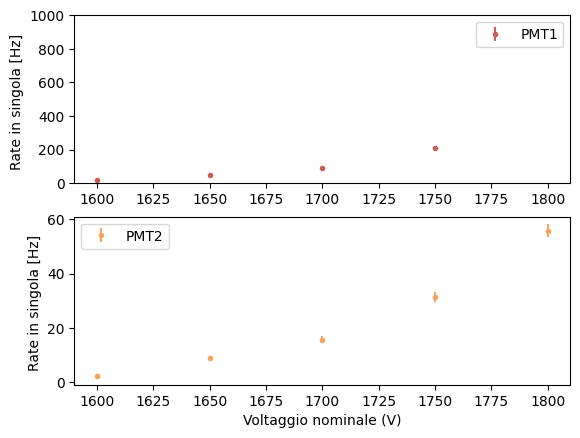

In [97]:
plt.figure()
plt.subplot(211)
plt.errorbar(V,rate1,errorrate1, fmt='.', color='indianred',label='PMT1')
plt.ylabel('Rate in singola [Hz] ')
plt.ylim(0,1000)
plt.legend()
plt.subplot(212)
plt.errorbar(V,rate2,errorrate2, fmt='.', color='sandybrown',label='PMT2')
plt.xlabel('Voltaggio nominale (V)')
plt.ylabel('Rate in singola [Hz] ')
plt.legend()